# Creazione screener evoluto su singolo asset

Architettura di un Bullish e Bearish Engulfing senza conferma.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ffn
import datetime

ticker = "CAT"
startdate = "2007-01-01"
enddate = "2020-11-10"

In [3]:
input_string = ticker + ":Open," + ticker + ":High," + \
               ticker + ":Low," + ticker + ":Close," + ticker + ":Volume"
input_string

'CAT:Open,CAT:High,CAT:Low,CAT:Close,CAT:Volume'

In [5]:
dataset =  ffn.get(input_string, start = startdate, end = enddate).apply(lambda x: round(x,2))
dataset.head(10)

RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/CAT/history?period1=1167620400&period2=1605063599&interval=1d&frequency=1d&filter=history
Response Text:
b'<!DOCTYPE html>\n  <html lang="en-us"><head>\n  <meta http-equiv="content-type" content="text/html; charset=UTF-8">\n      <meta charset="utf-8">\n      <title>Yahoo</title>\n      <meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui">\n      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n      <style>\n  html {\n      height: 100%;\n  }\n  body {\n      background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;\n      background-size: cover;\n      height: 100%;\n      text-align: center;\n      font: 300 18px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;\n  }\n  table {\n      height: 100%;\n      width: 100%;\n      table-layout: fixed;\n      border-collapse: collapse;\n      border-spacing: 0;\n      border: none;\n  }\n  h1 {\n      font-size: 42px;\n      font-weight: 400;\n      color: #400090;\n  }\n  p {\n      color: #1A1A1A;\n  }\n  #message-1 {\n      font-weight: bold;\n      margin: 0;\n  }\n  #message-2 {\n      display: inline-block;\n      *display: inline;\n      zoom: 1;\n      max-width: 17em;\n      _width: 17em;\n  }\n      </style>\n  <script>\n    document.write(\'<img src="//geo.yahoo.com/b?s=1197757129&t=\'+new Date().getTime()+\'&src=aws&err_url=\'+encodeURIComponent(document.URL)+\'&err=%<pssc>&test=\'+encodeURIComponent(\'%<{Bucket}cqh[:200]>\')+\'" width="0px" height="0px"/>\');var beacon = new Image();beacon.src="//bcn.fp.yahoo.com/p?s=1197757129&t="+new Date().getTime()+"&src=aws&err_url="+encodeURIComponent(document.URL)+"&err=%<pssc>&test="+encodeURIComponent(\'%<{Bucket}cqh[:200]>\');\n  </script>\n  </head>\n  <body>\n  <!-- status code : 404 -->\n  <!-- Not Found on Server -->\n  <table>\n  <tbody><tr>\n      <td>\n      <img src="https://s.yimg.com/rz/p/yahoo_frontpage_en-US_s_f_p_205x58_frontpage.png" alt="Yahoo Logo">\n      <h1 style="margin-top:20px;">Will be right back...</h1>\n      <p id="message-1">Thank you for your patience.</p>\n      <p id="message-2">Our engineers are working quickly to resolve the issue.</p>\n      </td>\n  </tr>\n  </tbody></table>\n  </body></html>'

In [ ]:
dataset.columns = ["open","high","low","close","volume"]
dataset.tail(10)

In [ ]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

graph_title = ticker + " from " + str(dataset.index[0]) + " to " \
                                + str(dataset.index[-1]) + " - Powered by Gandalf Project R&D"
dataset.tail(100).iplot(kind = 'candle', theme = 'white',
                       up_color = 'green', down_color = 'red',
                       title = graph_title, xTitle = "Time", yTitle = "Prices")

In [ ]:
dataset["range_perc"] = (dataset.high - dataset.low) / dataset.low * 100
dataset["open_pos"] = (dataset.open - dataset.low) / (dataset.high - dataset.low) * 100
dataset["close_pos"] = (dataset.close - dataset.low) / (dataset.high - dataset.low) * 100
dataset["SMA20"] = dataset.close.rolling(20).mean()
dataset["STD20"] = dataset.close.rolling(20).std()
dataset["BBU"] = dataset.SMA20 + 2 * dataset.STD20
dataset["BBL"] = dataset.SMA20 - 2 * dataset.STD20
dataset.dropna(inplace = True)
dataset.head(10)

In [ ]:
plt.figure(figsize = [12,8], dpi = 300)
plt.title(graph_title)
dataset.close.plot()
dataset.BBU.plot()
dataset.BBL.plot().grid()

# <span style="color:green">Esempio pattern "Bullish Engulfing"</span>

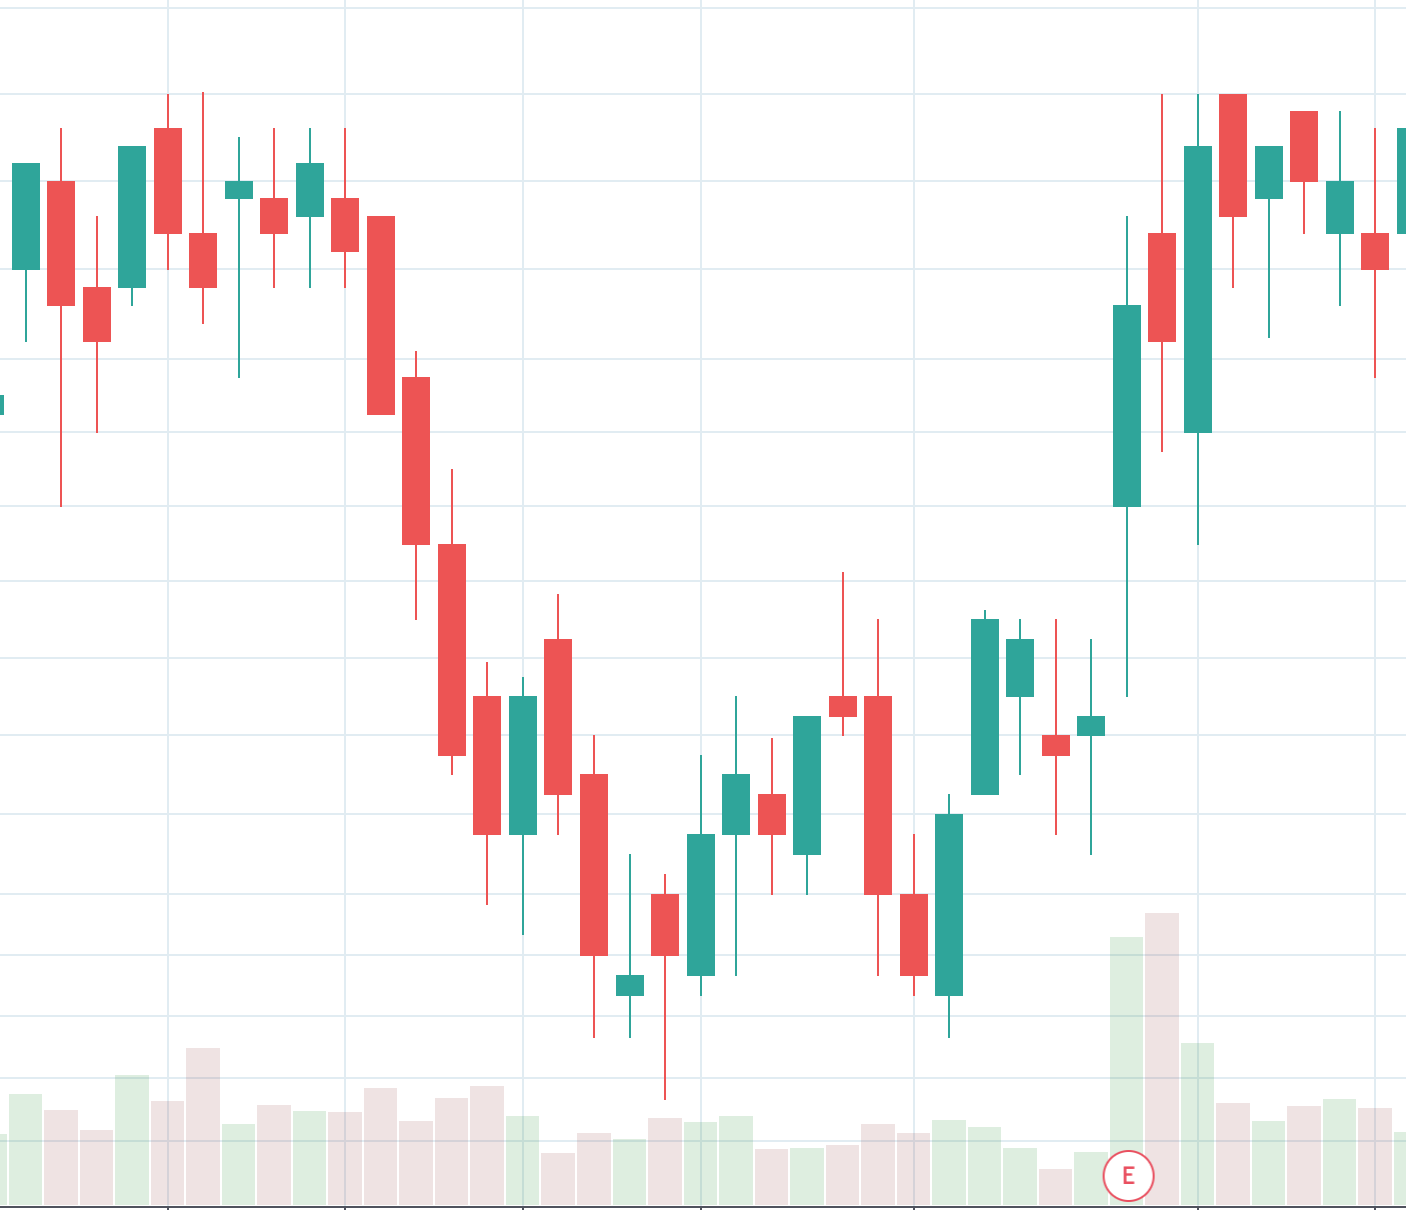

In [9]:
pattern = ((dataset.low < dataset.BBL) | (dataset.low.shift(1) < dataset.BBL.shift(1))) & \
          (dataset.close > dataset.open) & (dataset.close.shift(1) < dataset.open.shift(1)) & \
          (dataset.open < dataset.close.shift(1)) & (dataset.close > dataset.open.shift(1)) & \
          (dataset.close_pos > 70) & (dataset.open_pos < 30) & \
          (dataset.range_perc > 1)

Occurrences: 4 

DatetimeIndex(['2008-01-22', '2010-05-21', '2018-02-06', '2018-03-05'], dtype='datetime64[ns]', name='Date', freq=None) 

After: 1 days: 1.77 average of 0.44 with 2 winning trades and 2 loosing trades
After: 2 days: -8.66 average of -2.16 with 1 winning trades and 3 loosing trades
After: 3 days: -2.16 average of -0.54 with 2 winning trades and 2 loosing trades
After: 4 days: 10.19 average of 2.55 with 3 winning trades and 1 loosing trades
After: 5 days: 7.6 average of 1.9 with 3 winning trades and 1 loosing trades
After: 6 days: 8.84 average of 2.21 with 3 winning trades and 1 loosing trades
After: 7 days: 13.75 average of 3.44 with 3 winning trades and 1 loosing trades
After: 8 days: 13.11 average of 3.28 with 4 winning trades and 0 loosing trades
After: 9 days: 10.11 average of 2.53 with 3 winning trades and 1 loosing trades
After: 10 days: 0.11 average of 0.03 with 1 winning trades and 3 loosing trades


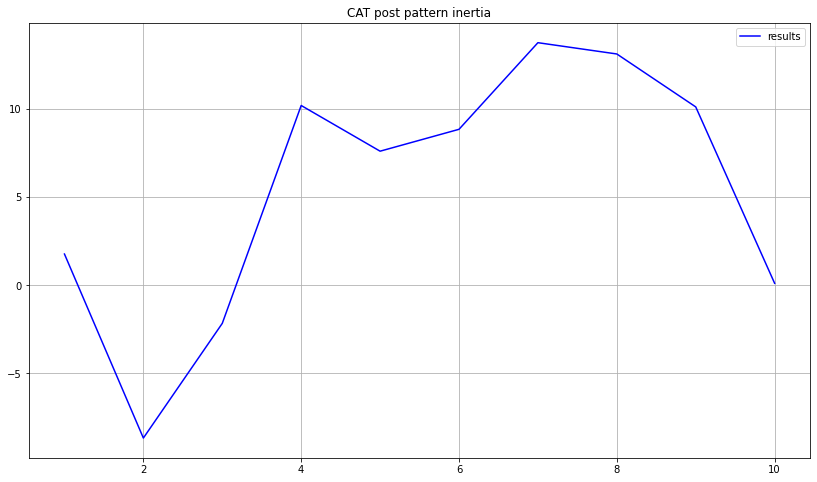

In [10]:
def pattern_stats(dataframe, pattern, direction, delay, ticker):
    """
    Function to calculate pattern stats
    """
    service = dataframe.copy()
    dates = service[pattern == True].index
    occurrences = service[pattern == True].count()[0]
    print("Occurrences:", occurrences, "\n")
    print(dates,"\n")
    results = []
    for i in range(0, delay):
        label = "st" + str(i)
        if direction == "long":
            service[label] = np.where(pattern.shift(1) == True, service.close.shift(-i) - service.open, np.nan)
        else:
            service[label] = np.where(pattern.shift(1) == True, -service.close.shift(-i) + service.open, np.nan)
        profit = round(service[label].sum(),2)
        avg_profit = round(profit / occurrences, 2)
        winning_trades = service[service[label] > 0].count()[0]
        loosing_trades = service[service[label] <= 0].count()[0]
        print("After:", i + 1,  "days:", profit, "average of", avg_profit, "with", winning_trades, "winning trades and", loosing_trades, "loosing trades")
        results.append(profit)
    plotting_results = pd.DataFrame(results, columns = ["results"], 
                                    index = range(1, delay + 1))
    plotting_results.plot(figsize = [14,8], color = "blue").grid()
    plt.title(ticker + " post pattern inertia")
    plt.show()
    return dates, plotting_results

results = pattern_stats(dataset, pattern, "long", 10, ticker)

In [11]:
def plot_patterns(dataframe,results):
    """
    Function that plots every single pattern occurrence
    """
    for date in results:
        single_case = dataframe[(dataframe.index >= (date - pd.Timedelta(days = 3))) & \
                                (dataframe.index <= (date + pd.Timedelta(days = 20)))]    
        graph_title = ticker + " from " + str(single_case.index[0]) + " - Powered by Gandalf Project R&D"

        single_case.iplot(kind = 'candle',theme = 'white',
                          up_color = "green", down_color = "red",
                          title = graph_title, xTitle = "Time", yTitle = "Prices")
    return

plot_patterns(dataset,results[0])

# <span style="color:red">Esempio "Bearish Engulfing"</span>

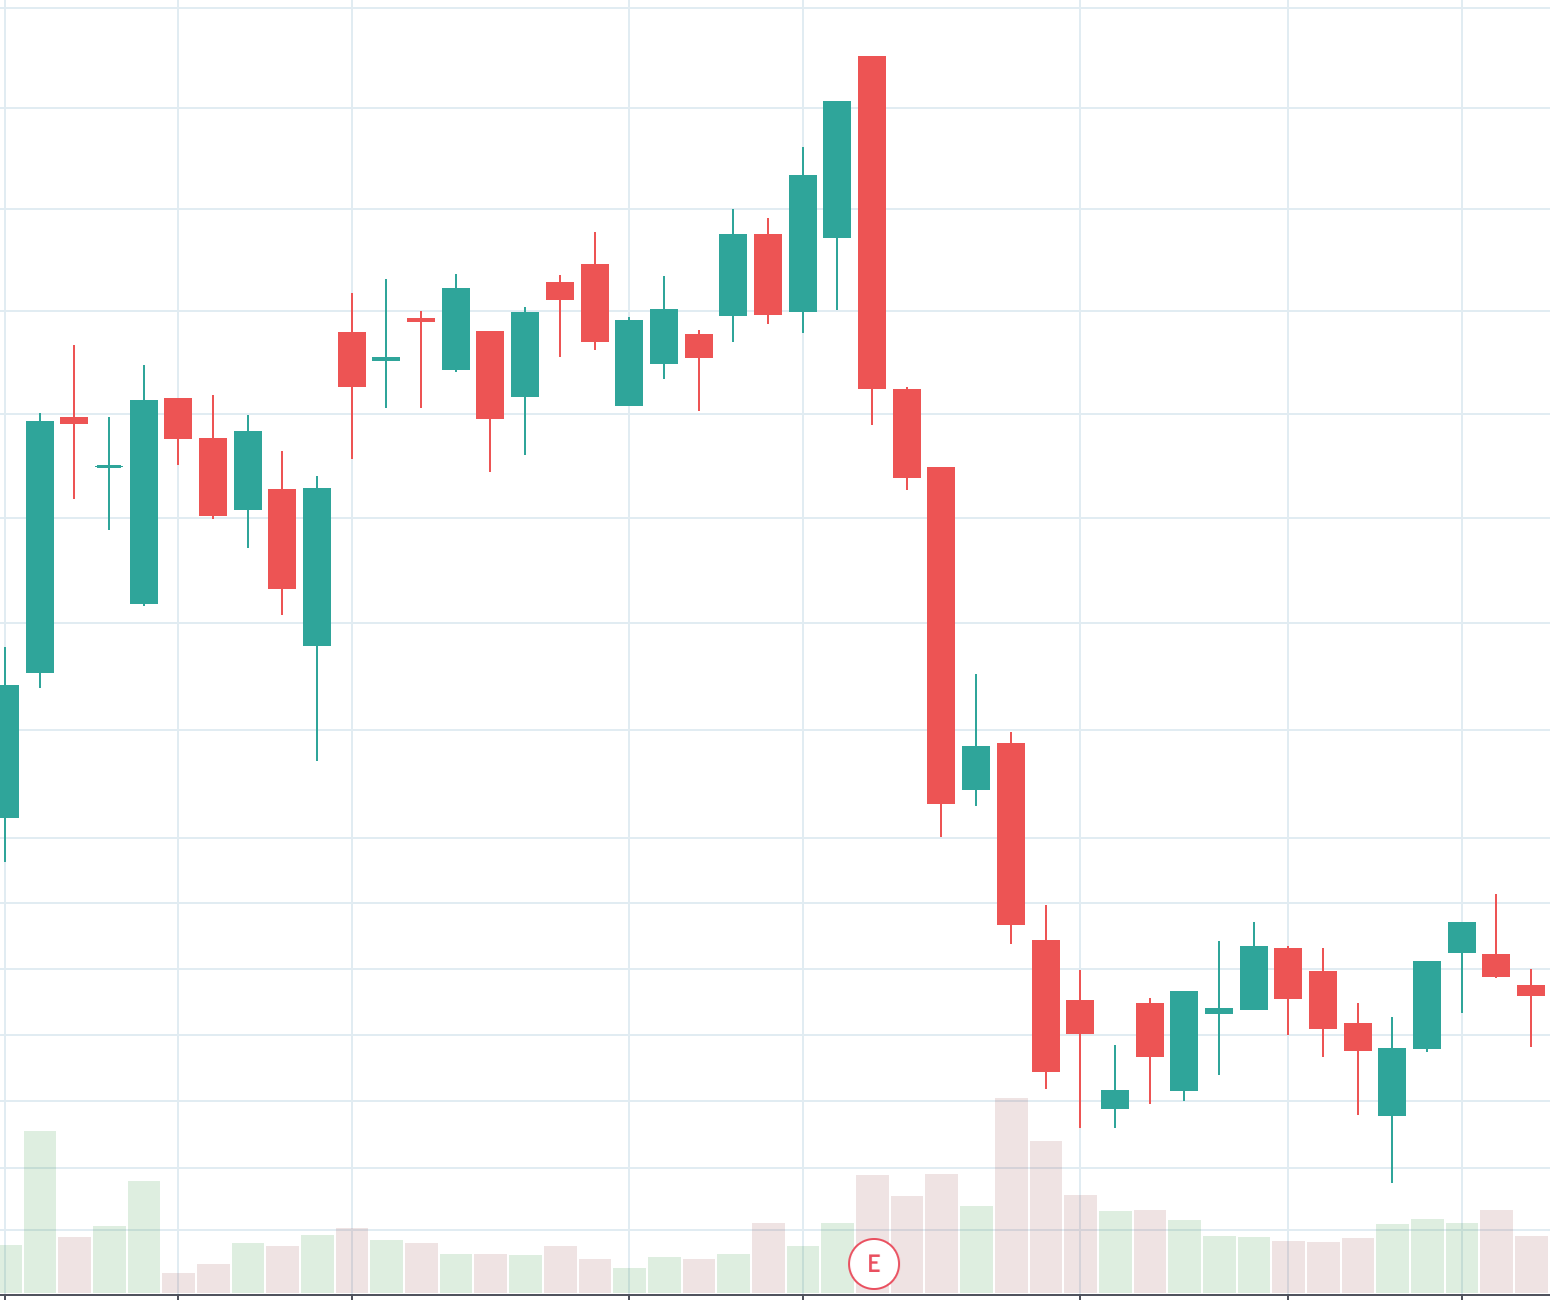

In [12]:
pattern = ((dataset.high > dataset.BBU) | (dataset.high.shift(1) > dataset.BBU.shift(1))) & \
          (dataset.close < dataset.open) & (dataset.close.shift(1) > dataset.open.shift(1)) & \
          (dataset.open > dataset.close.shift(1)) & (dataset.close < dataset.open.shift(1)) & \
          (dataset.close_pos < 30) & (dataset.open_pos > 70) & \
          (dataset.range_perc > 1)

Occurrences: 11 

DatetimeIndex(['2007-06-20', '2007-12-11', '2008-02-04', '2009-05-07',
               '2010-04-30', '2011-05-02', '2011-10-17', '2013-07-17',
               '2014-03-13', '2016-10-04', '2017-09-06'],
              dtype='datetime64[ns]', name='Date', freq=None) 

After: 1 days: -3.32 average of -0.3 with 5 winning trades and 6 loosing trades
After: 2 days: 4.37 average of 0.4 with 7 winning trades and 4 loosing trades
After: 3 days: 5.53 average of 0.5 with 6 winning trades and 5 loosing trades
After: 4 days: 7.87 average of 0.72 with 7 winning trades and 4 loosing trades
After: 5 days: 7.03 average of 0.64 with 8 winning trades and 3 loosing trades
After: 6 days: 2.65 average of 0.24 with 7 winning trades and 4 loosing trades
After: 7 days: 1.25 average of 0.11 with 7 winning trades and 4 loosing trades
After: 8 days: -12.15 average of -1.1 with 7 winning trades and 4 loosing trades
After: 9 days: -5.69 average of -0.52 with 7 winning trades and 4 loosing trades
Afte

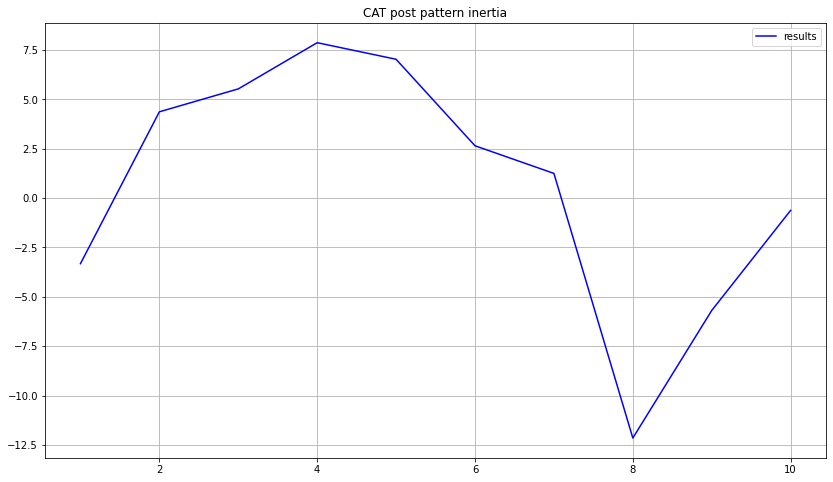

In [13]:
results = pattern_stats(dataset, pattern, "short", 10, ticker)

In [14]:
plot_patterns(dataset,results[0])